In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df = pd.read_csv('/content/fraudTest.csv')

In [52]:
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [53]:
df = df.drop(['trans_date_trans_time', 'first', 'last', 'street', 'dob', 'trans_num'], axis=1)

In [54]:
label_encoders = {}
for column in ['merchant', 'category', 'gender', 'city', 'state', 'job']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [55]:
df = df.fillna(df.mean())

In [56]:
scaler = StandardScaler()
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [57]:
train_df = df.iloc[:len(train_df), :]
test_df = df.iloc[len(train_df):, :]

In [58]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [59]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [60]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [61]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [63]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [64]:
models = {
    'Logistic Regression': (y_pred_lr, model_lr),
    'Decision Tree': (y_pred_dt, model_dt),
    'Random Forest': (y_pred_rf, model_rf)
}

Logistic Regression accuracy: 0.9961401355721147
Logistic Regression Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Logistic Regression Confusion Matrix:


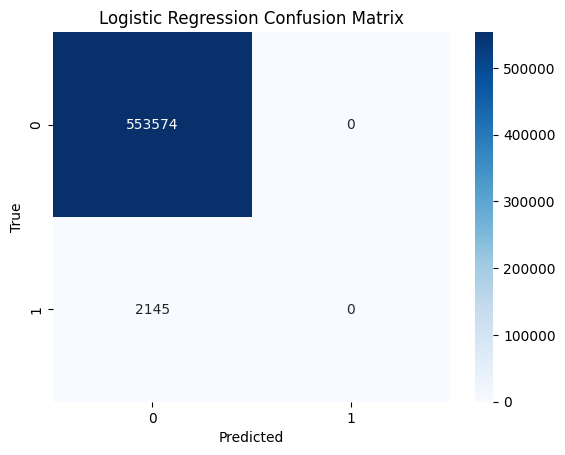

Decision Tree accuracy: 0.9747174381297022
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.09      0.59      0.15      2145

    accuracy                           0.97    555719
   macro avg       0.54      0.78      0.57    555719
weighted avg       0.99      0.97      0.98    555719

Decision Tree Confusion Matrix:


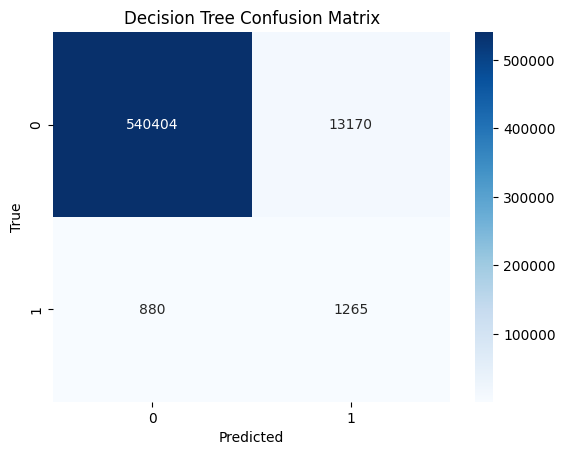

Random Forest accuracy: 0.9972881978122037
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.42      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.71      0.77    555719
weighted avg       1.00      1.00      1.00    555719

Random Forest Confusion Matrix:


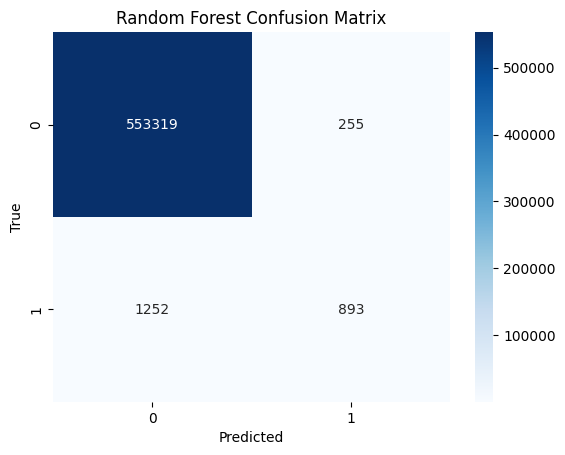

In [65]:

for name, (y_pred, model) in models.items():
    print(f'{name} accuracy:', accuracy_score(y_test, y_pred))
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'{name} Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [66]:
def plot_feature_importances(model, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

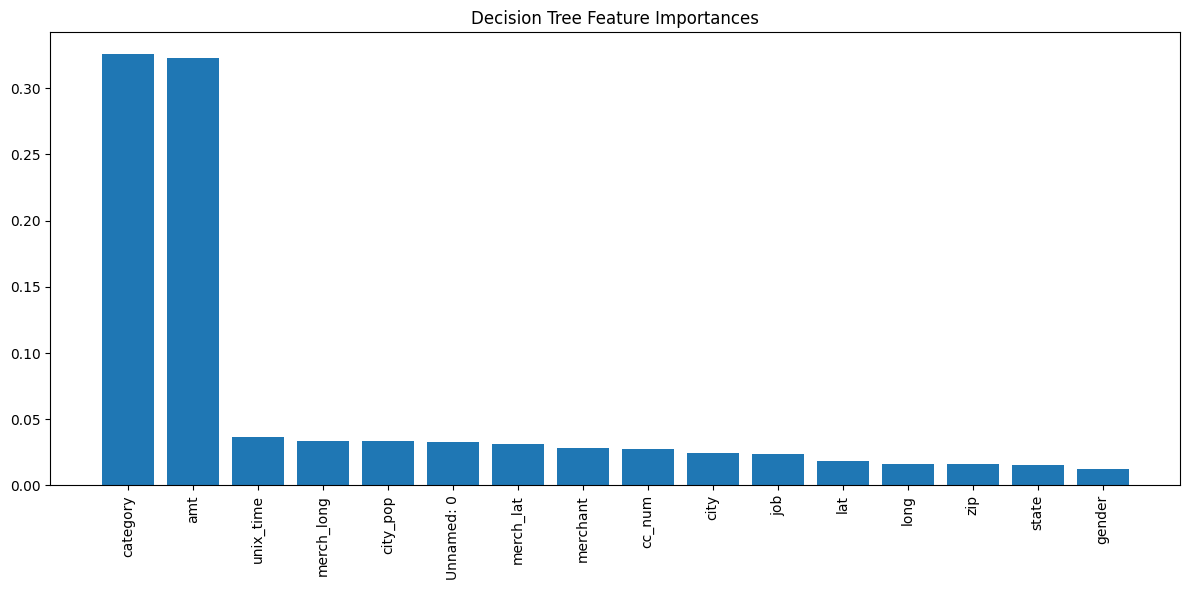

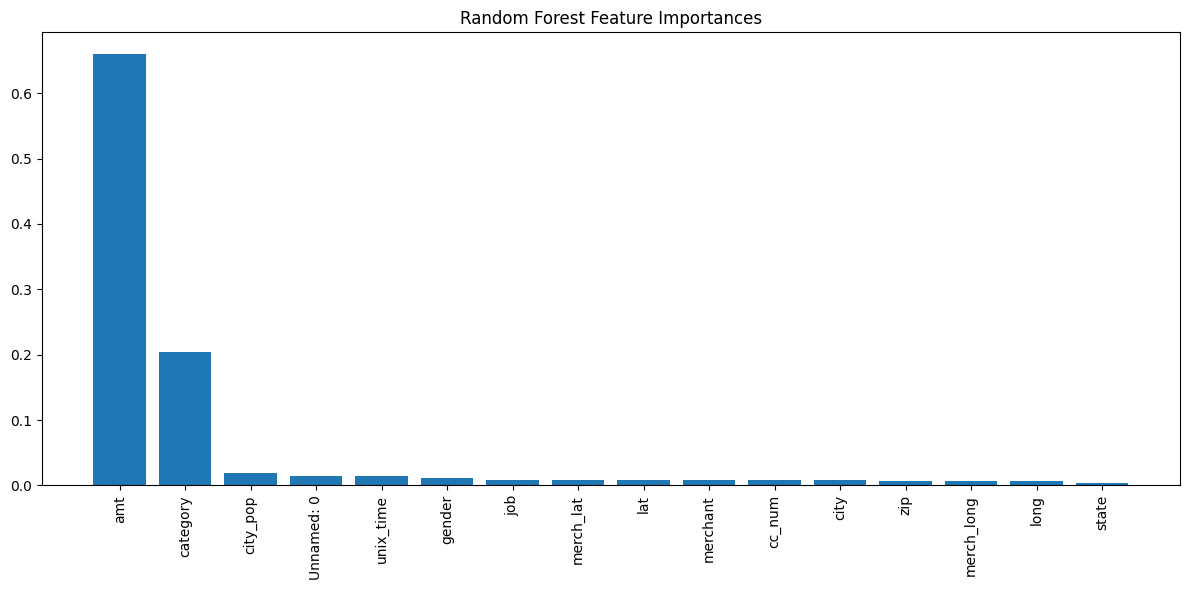

In [67]:
plot_feature_importances(model_dt, 'Decision Tree Feature Importances')
plot_feature_importances(model_rf, 'Random Forest Feature Importances')